<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 2

### Problem 0 (3 points)

## Part 1: High-Dimensional Neighborhoods 

### Problem 1.1 (Exam Style)

0-dimensional neighbors: +++, ---, ++-, +-+, -++, +--, -+-, --+

1-dimensional neighbors: --0, +-0, -+0, ++0, -0-, +0-, -0+, +0+, 0++, 0--, 0+-, 0-+

2-dimensional neighbors: -00, +00, 0-0, 0+0, 00+, 00-

Total number of bins is 26；one internal cell in three dimensions now have 26 neighbors; a 3x3 block has 27 blocks, 27-1 = 26. Adding up the 0,1,2 dimensional neighbors also yield 26.

### Problem 1.2 (Exam Style)

$$n(d,b) = 2^{d-b} {d \choose b} $$

The number of 0's (or the dimension(s) that match that of the internal bin) sequentially add up for the 0+- notation as we go up in d (the number of 0's actually match up with the n in n-dimensional neighbors, which intuitively makes a lot of sense because the 0's symbolize a certain 'dimension' the neighbor is sharing with the internal bin). We also know that a certain d always have d letters/elements in the 0+- notation (3d bin has 3 slots for 0+- notation). To find out the number of neighbors there are in a certain d, we can first find out the slots that are not 0 (so +/-), and enumerate how many there can be of that with $2^{d-b}$. And then we look for all the combinations there can be for $b$ 0's in $d$ slots for the 0+- notation, and multiply the two numbers together.

$$m(d) = \sum_{b=0}^{b = d-1} 2^{d-b} {d\choose b} $$

$$
\begin{array}{c|c|*{5}{c}}
d & m(d) & n(d, 0) & n(d, 1) & n(d, 2) & n(d, 3) & n(d, 4) \\\hline
1 & 2 & 2 & - & - & - & - \\
2 & 8 & 4& 4& - & - & - \\
3 & 26 & 8 & 12 & 6 & - & - \\
4 & 80 & 16 & 32 & 24 & 8 & - \\
5 & 242 & 32 & 80 & 80 & 40 & 10
\end{array}
$$

## Part 2: Random Gaussian Vectors 

### Problem 2.1

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import math


def samples(n,d):
    if (d==1):
        sigma = math.sqrt(math.pi/2)
    else:
        sigma = 1/math.sqrt(d-1)
    mu = 0
    p = np.random.normal(mu, sigma, (n,d))
    return p 

In [4]:
def distances(p):
    return np.apply_along_axis(np.linalg.norm, 1, p)

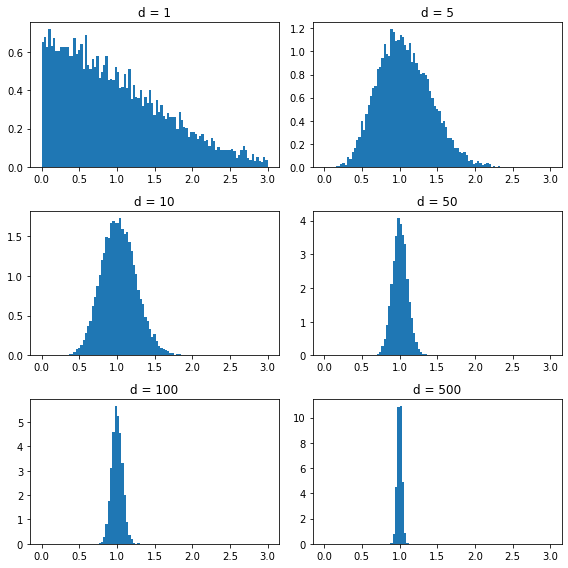

In [6]:
%matplotlib inline

d = np.array([1, 5, 10, 50, 100, 500])
bins = np.linspace(0, 3, 100)

plt.figure(figsize=(8,8))
for i, _d in enumerate (d):
    plt.subplot(3,2, i+1)
    plt.hist(distances(samples(10000,_d)), bins=bins, density=True)
    plt.title('d = '+ str(_d))
    plt.tight_layout()

plt.show()

Most Gaussian random d-dimensional vectors with mean zero and mean norm of 1 when d is large are at 1. Standard deviation is decreasing as d increases. Aside from the histogram for d=1, which we used a different sigma function for, majority of the rest should cluster around 1 in a gaussian fashion.

## Part 3: Linear Separability and Voronoi Diagrams 

### Problem 3.1 (Exam Style)



$$V: x_1 - b = 0 \mid 2 \leq b < 5 $$ 

### Problem 3.2 (Exam Style)

$H$ is an empty set.

### Problem 3.3 (Exam Style)

$$ h(x)_1 = 
\begin{array}{cc}
  \Big\{ & 
    \begin{array}{cc}
      1 & \text{if } 1 + x_1 - x_2 > 0 \\
      0 & \text{if } 1 + x_1 - x_2 \leq 0
    \end{array}
\end{array}
$$

$$ h(x)_2 = 
\begin{array}{cc}
  \Big\{ & 
    \begin{array}{cc}
      1 & \text{if } x_1 - 5 \geq 0 \\
      0 & \text{if } x_1 - 5 < 0
    \end{array}
\end{array}
$$

$$ h(x)_3 = 
\begin{array}{cc}
  \Big\{ & 
    \begin{array}{cc}
      1 & \text{if } 3x_1 +5-5x_2 > 0 \\
      0 & \text{if } 3x_1 +5-5x_2 < 0
    \end{array}
\end{array}
$$

$$ h(x)_4 = 
\begin{array}{cc}
  \Big\{ & 
    \begin{array}{cc}
      1 & \text{if } x_1 + x_2 - 5 > 0 \\
      0 & \text{if } x_1 + x_2 - 5 < 0
    \end{array}
\end{array}
$$

### Problem 3.4 (Exam Style)

a) There are a total of 5 edges

b) $(2,2), (3,1)$

c) $$x-2=0: q,r$$ 
 $$x-3=0: p,s$$
  $$y-2=0: p,q$$
  $$y+x-4 =0: p,r$$
  $$2y -x+1 = 0: r,s$$
  
  

## Part 4: Nearest Neighbors

In [8]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall21', course='371d', homework=2):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [9]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D


def decorate(x_label=None, y_label=None, title=None,
             line_width=3, font_size=24):
    for child in plt.gca().get_children():
        if isinstance(child, Line2D):
            plt.setp(child, linewidth=line_width)
    legend_handles, _ = plt.gca().get_legend_handles_labels()
    if len(legend_handles):
        plt.legend(fontsize=font_size)
    if x_label is not None:
        plt.xlabel(x_label, fontsize=font_size, labelpad=5)
    if y_label is not None:
        plt.ylabel(y_label, fontsize=font_size, labelpad=15)
    plt.xticks(fontsize=font_size//1.5)
    plt.yticks(fontsize=font_size//1.5)
    if title is not None:
        plt.title(title, fontsize=font_size)

Using previously downloaded file data.pkl


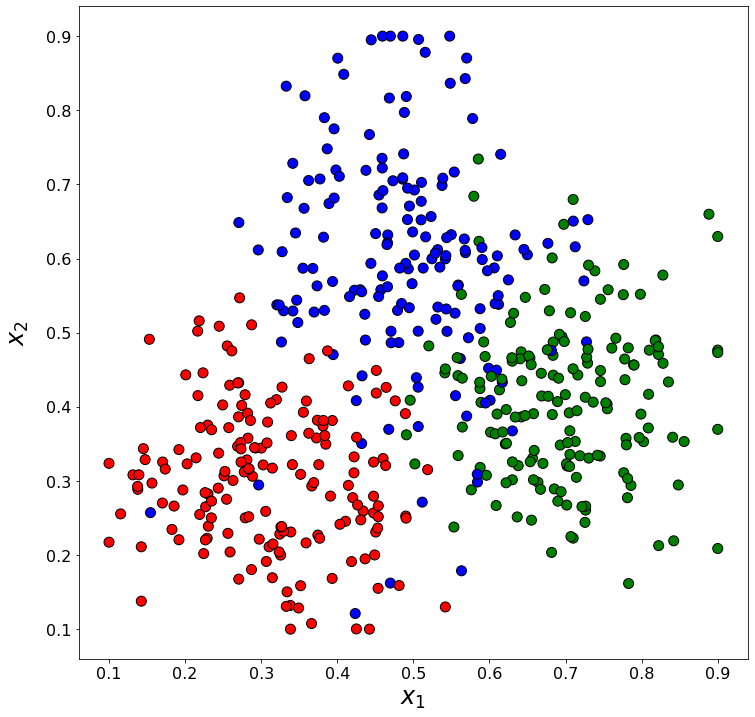

In [10]:
import pickle
from matplotlib.colors import ListedColormap



file_name = 'data.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    data = pickle.load(file)

plt.figure(figsize=(12, 12))
plt.scatter(data['x'][:, 0], data['x'][:, 1], marker='o',
            s=100, edgecolor='k', c=data['y'],
            cmap=ListedColormap(('r', 'g', 'b')))
decorate(x_label='$x_1$', y_label='$x_2$')
plt.show()

In [11]:
from sklearn.neighbors import NearestNeighbors


def neighbors(query_points, training_points, k):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(training_points)
    indices = nn.kneighbors(query_points, return_distance=False)
    return indices

In [12]:
def knn(query_points, training_samples, k, summary):
    indices = neighbors(query_points, training_samples['x'], k)
    return summary(training_samples['y'][indices])

### Problem 4.1

In [13]:
import numpy as np

def probability(row):
    c0, c1, c2 = 0,0,0
    total = len(row)
    for label in row:
        if (label == 0):
            c0 += 1
        elif (label == 1):
            c1 += 1
        else:
            c2 +=1
    return np.array([c0/total, c1/total, c2/total])

In [14]:
def p_label(ys):
    ps = np.apply_along_axis(probability, 1, ys)
    return ps

In [15]:
import numpy as np

n_grid = 200
grid_points = np.linspace(0., 1., n_grid)
xx, yy = np.meshgrid(grid_points, grid_points)
queries = np.stack((xx.flatten(), yy.flatten()), axis=1)

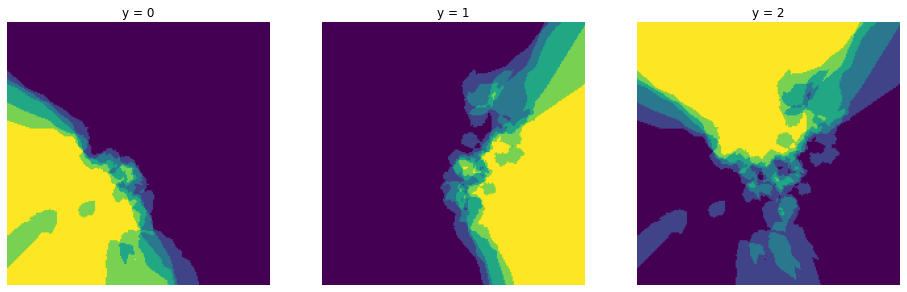

In [16]:
p = knn(queries, data, 5, p_label)

%matplotlib inline
plt.figure(figsize=(16,5))
for y in np.arange(3):
    plt.subplot(1,3, y+1)
    array = np.reshape(p[:,y],(n_grid,n_grid))
    plt.title('y = '+ str(y))
    plt.axis('off')
    plt.imshow(array, cmap=plt.cm.viridis, origin='lower')


### Problem 4.2

In [17]:
def majority(ys):
    return np.argmax(p_label(ys), axis = 1)

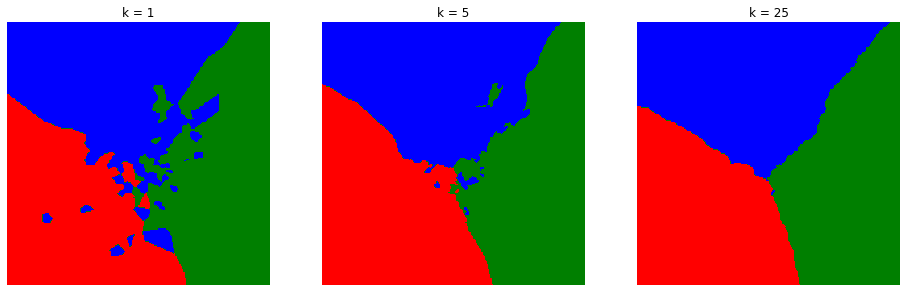

In [19]:
K = np.array([1,5,25])

plt.figure(figsize=(16,5))
for i, k in enumerate (K):
    plt.subplot(1,3, i+1)
    plt.title('k = '+str(k))
    plt.axis('off')
    array = np.reshape(knn(queries, data, k, majority),(n_grid,n_grid))
    plt.imshow(array, cmap=ListedColormap(('r', 'g', 'b')), origin='lower')